[*********************100%***********************]  1 of 1 completed


Accuracy: 0.54


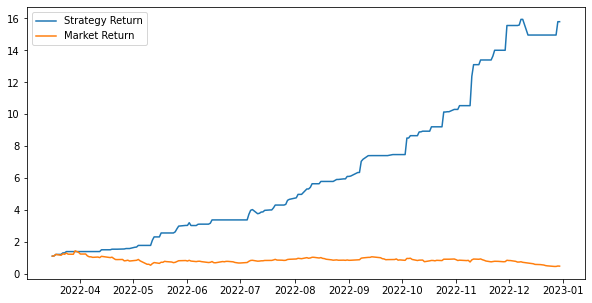

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()
    data.dropna(inplace=True)
    return data

# 2. Create features
def create_features(data):
    data['SMA_10'] = data['Close'].rolling(10).mean()
    data['SMA_50'] = data['Close'].rolling(50).mean()
    data['Momentum'] = data['Close'] - data['Close'].shift(10)
    data['Target'] = (data['Return'] > 0).astype(int)
    data.dropna(inplace=True)
    return data

# 3. Train model
def train_model(data):
    features = ['SMA_10', 'SMA_50', 'Momentum']
    X = data[features]
    y = data['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
    return model

# 4. Backtest
def backtest(data, model):
    features = ['SMA_10', 'SMA_50', 'Momentum']
    data['Signal'] = model.predict(data[features])
    data['Strategy_Return'] = data['Signal'] * data['Return']
    cumulative_strategy_return = (1 + data['Strategy_Return']).cumprod()
    cumulative_market_return = (1 + data['Return']).cumprod()

    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_strategy_return, label="Strategy Return")
    plt.plot(cumulative_market_return, label="Market Return")
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    ticker = "RIVN"  # Example: Apple stock
    start_date = "2022-01-01"
    end_date = "2023-01-01"

    # Fetch and prepare data
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    stock_data = create_features(stock_data)

    # Train and evaluate model
    trained_model = train_model(stock_data)

    # Backtest strategy
    backtest(stock_data, trained_model)


In [12]:
stock_data

Price,Close,High,Low,Open,Volume,Return,SMA_10,SMA_50,Momentum,Target,Signal,Strategy_Return
Ticker,RIVN,RIVN,RIVN,RIVN,RIVN,,,,,,,
Date,,,,,,,,,,,,
2022-03-16,41.580002,42.099998,37.650002,38.500000,23752200,0.123784,42.051,62.9778,-11.980000,1,1,0.123784
2022-03-17,42.130001,42.750000,38.520000,40.840000,17167200,0.013227,41.173,61.7926,-8.779999,1,1,0.013227
2022-03-18,45.599998,45.700001,42.332001,42.610001,19770600,0.082364,40.994,60.9044,-1.790001,1,1,0.082364
2022-03-21,43.560001,46.549999,42.310001,45.639999,13227000,-0.044737,41.107,60.0290,1.130001,0,0,-0.000000
2022-03-22,46.930000,48.299999,43.130001,43.650002,13110500,0.077365,41.579,59.2420,4.720001,1,1,0.077365
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,19.139999,19.770000,18.521999,19.764999,18952000,-0.029904,22.489,29.5620,-8.150002,0,0,-0.000000
2022-12-27,17.740000,18.700001,17.650000,18.650000,21663000,-0.073145,21.702,29.3426,-7.870001,0,0,-0.000000
